In [1]:
import pandas as pd
import numpy as np
import re
# Load the data
df = pd.read_csv('../data/raw/naukri_job_listings.csv')

In [2]:
df.shape

(29432, 9)

In [540]:
df[df['Time Posted'] == 'Just Now'].count()

Job Title              39
Company Name           39
Experience Required    39
Salary                 39
Location               39
Description            39
Skills                 39
Time Posted            39
Reviews                39
dtype: int64

In [541]:
features_na = [features for features in df.columns]
for feature in features_na:
    print(feature, np.round(df[feature].isnull().mean(), 4),  ' % missing values and actual count is '+str(df[feature].isnull().sum()))

print('Total entries:{}'.format(len(df)))

Job Title 0.0  % missing values and actual count is 0
Company Name 0.0  % missing values and actual count is 0
Experience Required 0.0  % missing values and actual count is 0
Salary 0.0  % missing values and actual count is 0
Location 0.0  % missing values and actual count is 0
Description 0.0  % missing values and actual count is 0
Skills 0.0  % missing values and actual count is 0
Time Posted 0.0  % missing values and actual count is 0
Reviews 0.0  % missing values and actual count is 0
Total entries:19465


In [459]:
df.head(3)

,Job Title,Company Name,Experience Required,Salary,Location,Description,Skills,Time Posted,Reviews
0,Software Engineer - Dot Net Core,Tech Mahindra,5-8 Yrs,Not disclosed,"Hybrid - Hyderabad, Chennai, Bengaluru",We have Virutal drive for this weekend Hurry u...,".Net, Angular, Net Core Development, Entity Fr...",1 Day Ago,29139 Reviews
1,"Software Engineer, Senior Fullstack",Affinity Global Advertising,2-6 Yrs,Not disclosed,Bengaluru,Contributing to team and organizational improv...,"System architecture, Cloud computing, Backend,...",1 Day Ago,89 Reviews
2,Software Engineer (.Net Fullstack),Blue Yonder,3-6 Yrs,Not disclosed,Hyderabad,Deliver on these promises through self-healing...,"GIT, RDBMS, Debugging, Javascript, Data struct...",1 Day Ago,450 Reviews


In [460]:
df['Time Posted'].unique()

array(['1 Day Ago', '3 Days Ago', '2 Days Ago', '7 Days Ago',
       '4 Days Ago', '11 Days Ago', '30+ Days Ago', '14 Days Ago',
       '12 Days Ago', '9 Days Ago', '13 Days Ago', '8 Days Ago',
       '28 Days Ago', 'Starts in 1-3 months', '5 Days Ago', '17 Days Ago',
       '10 Days Ago', '16 Days Ago', '24 Days Ago', '23 Days Ago',
       '30 Days Ago', '18 Days Ago', '22 Days Ago', '25 Days Ago',
       '15 Days Ago', '29 Days Ago', '21 Days Ago', '26 Days Ago',
       '27 Days Ago', 'Starts in 3-6 months', '6 Days Ago', '19 Days Ago',
       'Few Hours Ago', 'Just Now', '20 Days Ago', 'Today',
       'Starts within 1 month', "Starts : 26th Dec' 20"], dtype=object)

In [461]:
df['Experience Required'].unique()

array(['5-8 Yrs', '2-6 Yrs', '3-6 Yrs', '3-5 Yrs', '4-8 Yrs', '5-10 Yrs',
       '2-5 Yrs', '4-9 Yrs', '2-4 Yrs', '2-7 Yrs', '1-4 Yrs', '1-3 Yrs',
       '3-8 Yrs', '4-7 Yrs', '7-10 Yrs', '6-9 Yrs', '1-2 Yrs', '3-7 Yrs',
       '0-2 Yrs', '10-13 Yrs', '8-12 Yrs', '5-9 Yrs', '7-12 Yrs',
       '6-8 Yrs', '4-6 Yrs', '6-10 Yrs', '5-7 Yrs', 'no data available',
       '12-14 Yrs', '0-1 Yrs', '6-11 Yrs', '0-4 Yrs', '15-20 Yrs',
       '8-11 Yrs', '7-11 Yrs', '8-13 Yrs', '5-6 Yrs', '3-4 Yrs',
       '10-20 Yrs', '1-5 Yrs', '9-11 Yrs', '5-12 Yrs', '2-9 Yrs',
       '8-9 Yrs', '12-20 Yrs', '9-14 Yrs', '10-12 Yrs', '2-8 Yrs',
       '12-15 Yrs', '4-5 Yrs', '2-12 Yrs', '7-9 Yrs', '5 Yrs', '2-3 Yrs',
       '1-6 Yrs', '8-10 Yrs', '6-7 Yrs', '18-19 Yrs', '4-10 Yrs',
       '7-8 Yrs', '9-12 Yrs', '5-13 Yrs', '0-3 Yrs', '0-5 Yrs',
       '0-15 Yrs', '0 Yrs', '14-16 Yrs', '4-15 Yrs', '8-14 Yrs',
       '13-16 Yrs', '10-15 Yrs', '0-8 Yrs', '5-11 Yrs', '3-10 Yrs',
       '3-9 Yrs', '9-10 Yrs', '10-11 Y

In [462]:
df.shape

(9527, 9)

When you call match.group(1), you're accessing the value captured by the first group in the pattern.
If the pattern matched "5 Days Ago", match.group(1) would return '5'

In [463]:
import re
from datetime import datetime, timedelta

def parse_time_posted(time_str):
    # Get current date
    today = datetime.now()
    
    # Handle "Days Ago" format
    day_match = re.match(r'(\d+) Day[s]* Ago', time_str)
    if day_match:
        days_ago = int(day_match.group(1))
        return today - timedelta(days=days_ago)
    
    # Handle "Starts in X-Y months" format
    month_match = re.match(r'Starts in (\d+)-(\d+) months', time_str)
    if month_match:
        min_months, max_months = map(int, month_match.groups())
        average_days = (min_months + max_months) / 2 * 30
        return today + timedelta(days=average_days)
    
    # Handle "Starts within X month(s)" format
    month_match = re.match(r'Starts within (\d+) month[s]*', time_str)
    if month_match:
        months = int(month_match.group(1))
        return today + timedelta(days=months * 30)
    
    # Handle "Few Hours Ago"
    if 'Few Hours Ago' in time_str:
        return today - timedelta(hours=1)  # Assuming 1 hour ago for simplicity
    
    # Handle "Just Now"
    if 'Just Now' in time_str:
        return today
    
    # Handle "Today"
    if 'Today' in time_str:
        return today
    
    # Handle specific date formats like "Starts : 26th Dec' 20"
    date_match = re.match(r"Starts : (\d{1,2}[a-z]{2} \w{3}' \d{2})", time_str)
    if date_match:
        date_str = date_match.group(1)
        try:
            # Convert specific date format to datetime
            return datetime.strptime(date_str, "%d%b'%y")
        except ValueError:
            return None
    
    # Handle "X+ Days Ago"
    plus_days_match = re.match(r'(\d+)\+ Days Ago', time_str)
    if plus_days_match:
        days_ago = int(plus_days_match.group(1))
        return today - timedelta(days=days_ago)
    
    return None

# Apply the function to the Time Posted column
df['Time Posted'] = df['Time Posted'].apply(parse_time_posted)

In [464]:
print(df['Time Posted'].sample(10))

6352   2024-07-26 23:11:30.473177
8840   2024-07-25 23:11:30.491640
2924   2024-07-25 23:11:30.441871
3021   2024-07-25 23:11:30.441871
1248   2024-07-25 23:11:30.432947
6243   2024-08-15 23:11:30.473177
8603   2024-07-29 23:11:30.491640
7474   2024-07-25 23:11:30.485769
2816   2024-07-25 23:11:30.441871
4782   2024-07-30 23:11:30.453270
Name: Time Posted, dtype: datetime64[ns]


In [465]:
df.head(3)

,Job Title,Company Name,Experience Required,Salary,Location,Description,Skills,Time Posted,Reviews
0,Software Engineer - Dot Net Core,Tech Mahindra,5-8 Yrs,Not disclosed,"Hybrid - Hyderabad, Chennai, Bengaluru",We have Virutal drive for this weekend Hurry u...,".Net, Angular, Net Core Development, Entity Fr...",2024-08-23 23:11:30.412063,29139 Reviews
1,"Software Engineer, Senior Fullstack",Affinity Global Advertising,2-6 Yrs,Not disclosed,Bengaluru,Contributing to team and organizational improv...,"System architecture, Cloud computing, Backend,...",2024-08-23 23:11:30.412063,89 Reviews
2,Software Engineer (.Net Fullstack),Blue Yonder,3-6 Yrs,Not disclosed,Hyderabad,Deliver on these promises through self-healing...,"GIT, RDBMS, Debugging, Javascript, Data struct...",2024-08-23 23:11:30.412063,450 Reviews


In [466]:
import numpy as np

In [516]:
def parse_salary(salary_str):
    if 'Not disclosed' in salary_str:
        return np.nan
    else:
        try:
            salary_str = salary_str.replace('Lacs PA', '').strip()
            min_salary, max_salary = salary_str.split('-')
            return float(min_salary), float(max_salary)
        except ValueError:
            return np.nan, np.nan

df[['Min Salary', 'Max Salary']] = df['Salary'].apply(lambda x: pd.Series(parse_salary(x)))

In [517]:
df.head()

,Job Title,Company Name,Experience Required,Salary,Location,Description,Skills,Time Posted,Reviews,Min Salary,Max Salary
0,Software Engineer - Dot Net Core,Tech Mahindra,5-8 Yrs,Not disclosed,"Hybrid - Hyderabad, Chennai, Bengaluru",We have Virutal drive for this weekend Hurry u...,".Net, Angular, Net Core Development, Entity Fr...",1 Day Ago,29139 Reviews,NaN,NaN
1,"Software Engineer, Senior Fullstack",Affinity Global Advertising,2-6 Yrs,Not disclosed,Bengaluru,Contributing to team and organizational improv...,"System architecture, Cloud computing, Backend,...",1 Day Ago,89 Reviews,NaN,NaN
2,Software Engineer (.Net Fullstack),Blue Yonder,3-6 Yrs,Not disclosed,Hyderabad,Deliver on these promises through self-healing...,"GIT, RDBMS, Debugging, Javascript, Data struct...",1 Day Ago,450 Reviews,NaN,NaN
3,Lead Software Engineer - Java Full Stack,Eze Software Group,5-8 Yrs,Not disclosed,"Mumbai, Thane, Hyderabad, Pune",Hands on experience with various java / web te...,"RDBMS, TDD, Mutual funds, Healthcare, HTML, Ap...",1 Day Ago,37 Reviews,NaN,NaN
4,Sr. Software Engineer - Java Microservices,eQ Technologic,3-5 Yrs,Not disclosed,"Kolkata, Mumbai, New Delhi, Hyderabad, Pune, C...",Developing and maintaining eQ's products using...,"CVS, Analytical, MySQL, Debugging, Data struct...",1 Day Ago,71 Reviews,NaN,NaN


In [524]:
df.head()

,Job Title,Company Name,Experience Required,Salary,Location,Description,Skills,Time Posted,Reviews,Min Salary,Max Salary
0,Software Engineer - Dot Net Core,Tech Mahindra,5-8 Yrs,Not disclosed,"Hybrid - Hyderabad, Chennai, Bengaluru",We have Virutal drive for this weekend Hurry u...,".Net, Angular, Net Core Development, Entity Fr...",1 Day Ago,29139 Reviews,5.0,14.0
1,"Software Engineer, Senior Fullstack",Affinity Global Advertising,2-6 Yrs,Not disclosed,Bengaluru,Contributing to team and organizational improv...,"System architecture, Cloud computing, Backend,...",1 Day Ago,89 Reviews,0.0,0.0
2,Software Engineer (.Net Fullstack),Blue Yonder,3-6 Yrs,Not disclosed,Hyderabad,Deliver on these promises through self-healing...,"GIT, RDBMS, Debugging, Javascript, Data struct...",1 Day Ago,450 Reviews,0.0,0.0
3,Lead Software Engineer - Java Full Stack,Eze Software Group,5-8 Yrs,Not disclosed,"Mumbai, Thane, Hyderabad, Pune",Hands on experience with various java / web te...,"RDBMS, TDD, Mutual funds, Healthcare, HTML, Ap...",1 Day Ago,37 Reviews,0.0,0.0
4,Sr. Software Engineer - Java Microservices,eQ Technologic,3-5 Yrs,Not disclosed,"Kolkata, Mumbai, New Delhi, Hyderabad, Pune, C...",Developing and maintaining eQ's products using...,"CVS, Analytical, MySQL, Debugging, Data struct...",1 Day Ago,71 Reviews,0.0,0.0


In [522]:
min_salary_by_company = df.groupby('Company Name')['Min Salary'].transform('min')
max_salary_by_company = df.groupby('Company Name')['Max Salary'].transform('max')

df['Min Salary'] = df['Min Salary'].fillna(0)
df['Max Salary'] = df['Max Salary'].fillna(0)

In [523]:
df['Min Salary'].unique()

array([ 5.  ,  0.  , 45.  ,  6.  , 35.  ,  7.  , 10.  ,  8.5 ,  3.  ,
        4.  ,  8.  , 22.5 , 15.  , 16.  , 27.5 , 20.  , 14.  ,  6.5 ,
       12.  ,  3.5 ,  2.25,  2.  ,  9.5 ,  1.  ,  4.5 ,  2.75,  1.75,
        1.5 , 25.  , 10.2 , 30.  ,  2.5 , 18.  ,  9.  ,  7.5 , 80.  ,
       60.  ,  4.25,  5.5 , 13.  , 37.5 , 50.  ,  3.25, 17.  , 70.  ,
       19.  , 40.  , 11.  ,  1.25])

In [526]:
new_df = df[(df['Min Salary'] > 0) & (df['Max Salary'] > 0)]
new_df.shape

(893, 11)

In [475]:
df.head()

,Job Title,Company Name,Experience Required,Salary,Location,Description,Skills,Time Posted,Reviews,Min_salary,Max_salary
0,Software Engineer - Dot Net Core,Tech Mahindra,5-8 Yrs,Not disclosed,"Hybrid - Hyderabad, Chennai, Bengaluru",We have Virutal drive for this weekend Hurry u...,".Net, Angular, Net Core Development, Entity Fr...",2024-08-23 23:11:30.412063,29139 Reviews,5.0,14.0
1,"Software Engineer, Senior Fullstack",Affinity Global Advertising,2-6 Yrs,Not disclosed,Bengaluru,Contributing to team and organizational improv...,"System architecture, Cloud computing, Backend,...",2024-08-23 23:11:30.412063,89 Reviews,NaN,NaN
2,Software Engineer (.Net Fullstack),Blue Yonder,3-6 Yrs,Not disclosed,Hyderabad,Deliver on these promises through self-healing...,"GIT, RDBMS, Debugging, Javascript, Data struct...",2024-08-23 23:11:30.412063,450 Reviews,NaN,NaN
3,Lead Software Engineer - Java Full Stack,Eze Software Group,5-8 Yrs,Not disclosed,"Mumbai, Thane, Hyderabad, Pune",Hands on experience with various java / web te...,"RDBMS, TDD, Mutual funds, Healthcare, HTML, Ap...",2024-08-23 23:11:30.412063,37 Reviews,NaN,NaN
4,Sr. Software Engineer - Java Microservices,eQ Technologic,3-5 Yrs,Not disclosed,"Kolkata, Mumbai, New Delhi, Hyderabad, Pune, C...",Developing and maintaining eQ's products using...,"CVS, Analytical, MySQL, Debugging, Data struct...",2024-08-23 23:11:30.412063,71 Reviews,NaN,NaN


In [476]:
def standardize_location(location_str):
    # Define a mapping dictionary for standardizing locations
    location_mapping = {
        'Hyderabad': 'Hyderabad',
        'Bengaluru': 'Bengaluru',
        'Mumbai': 'Mumbai',
        'New Delhi': 'New Delhi',
        'Chennai': 'Chennai',
        'Pune': 'Pune',
        'Indore': 'Indore',
    }
    
    # Extract locations from the string (assumes the locations are separated by commas)
    locations = [loc.strip() for loc in location_str.split(',') if loc.strip()]
    # Standardize each location using the mapping
    standardized_locations = [location_mapping.get(loc, loc) for loc in locations]
    # Remove duplicates and return as a comma-separated string
    return ', '.join(sorted(set(standardized_locations)))

# Apply the function to the Location column
df['Location'] = df['Location'].apply(standardize_location)

In [477]:
df.head(2)

,Job Title,Company Name,Experience Required,Salary,Location,Description,Skills,Time Posted,Reviews,Min_salary,Max_salary
0,Software Engineer - Dot Net Core,Tech Mahindra,5-8 Yrs,Not disclosed,"Bengaluru, Chennai, Hybrid - Hyderabad",We have Virutal drive for this weekend Hurry u...,".Net, Angular, Net Core Development, Entity Fr...",2024-08-23 23:11:30.412063,29139 Reviews,5.0,14.0
1,"Software Engineer, Senior Fullstack",Affinity Global Advertising,2-6 Yrs,Not disclosed,Bengaluru,Contributing to team and organizational improv...,"System architecture, Cloud computing, Backend,...",2024-08-23 23:11:30.412063,89 Reviews,NaN,NaN


In [478]:
def clean_skills(skills_str):
    # Ensure the input is a string
    if not isinstance(skills_str, str):
        return ["no data available"]

    try:
        # Remove extraneous characters and extra spaces
        skills_str = re.sub(r'[^\w\s,]', '', skills_str)  # Remove invalid characters
        skills_str = re.sub(r'\s+', ' ', skills_str)  # Replace multiple spaces with single space
        
        # Convert to list of skills
        skills_list = [skill.strip().lower() for skill in skills_str.split(',') if skill.strip()]
        
        # Remove duplicates
        skills_list = list(set(skills_list))
        
        # Standardize skill names (capitalize first letter of each word)
        skills_list = [skill.title() for skill in skills_list]

        # Handle the case of no skills
        if not skills_list:
            return ["No skills listed"]
        
        return skills_list
    except Exception as e:
        # Handle any unexpected errors
        print(f"Error cleaning skills: {e}")
        return ["Error processing skills"]

# Apply the cleaning function to the Skills column
df['Skills'] = df['Skills'].apply(clean_skills)

In [479]:
df.head()

,Job Title,Company Name,Experience Required,Salary,Location,Description,Skills,Time Posted,Reviews,Min_salary,Max_salary
0,Software Engineer - Dot Net Core,Tech Mahindra,5-8 Yrs,Not disclosed,"Bengaluru, Chennai, Hybrid - Hyderabad",We have Virutal drive for this weekend Hurry u...,"[Entity Framework, Framework, Core, Software, ...",2024-08-23 23:11:30.412063,29139 Reviews,5.0,14.0
1,"Software Engineer, Senior Fullstack",Affinity Global Advertising,2-6 Yrs,Not disclosed,Bengaluru,Contributing to team and organizational improv...,"[Backend, System Architecture, Architecture, C...",2024-08-23 23:11:30.412063,89 Reviews,NaN,NaN
2,Software Engineer (.Net Fullstack),Blue Yonder,3-6 Yrs,Not disclosed,Hyderabad,Deliver on these promises through self-healing...,"[Customer Support, Git, Json, Data Structures,...",2024-08-23 23:11:30.412063,450 Reviews,NaN,NaN
3,Lead Software Engineer - Java Full Stack,Eze Software Group,5-8 Yrs,Not disclosed,"Hyderabad, Mumbai, Pune, Thane",Hands on experience with various java / web te...,"[Mvc, Tdd, Unit Testing, Mutual Funds, Healthc...",2024-08-23 23:11:30.412063,37 Reviews,NaN,NaN
4,Sr. Software Engineer - Java Microservices,eQ Technologic,3-5 Yrs,Not disclosed,"Bengaluru, Chennai, Hyderabad, Kolkata, Mumbai...",Developing and maintaining eQ's products using...,"[Cvs, Test Cases, Research, Information Techno...",2024-08-23 23:11:30.412063,71 Reviews,NaN,NaN


In [480]:
def parse_review(review_str):
    parts = review_str.split()    
    for part in parts:
        if part.isdigit(): 
            return int(part)
    
    # Handle cases where no numeric value is found or if it is 'no data available'
    return 0
df['Reviews'] = df['Reviews'].apply(parse_review)

In [481]:
df.head()

,Job Title,Company Name,Experience Required,Salary,Location,Description,Skills,Time Posted,Reviews,Min_salary,Max_salary
0,Software Engineer - Dot Net Core,Tech Mahindra,5-8 Yrs,Not disclosed,"Bengaluru, Chennai, Hybrid - Hyderabad",We have Virutal drive for this weekend Hurry u...,"[Entity Framework, Framework, Core, Software, ...",2024-08-23 23:11:30.412063,29139,5.0,14.0
1,"Software Engineer, Senior Fullstack",Affinity Global Advertising,2-6 Yrs,Not disclosed,Bengaluru,Contributing to team and organizational improv...,"[Backend, System Architecture, Architecture, C...",2024-08-23 23:11:30.412063,89,NaN,NaN
2,Software Engineer (.Net Fullstack),Blue Yonder,3-6 Yrs,Not disclosed,Hyderabad,Deliver on these promises through self-healing...,"[Customer Support, Git, Json, Data Structures,...",2024-08-23 23:11:30.412063,450,NaN,NaN
3,Lead Software Engineer - Java Full Stack,Eze Software Group,5-8 Yrs,Not disclosed,"Hyderabad, Mumbai, Pune, Thane",Hands on experience with various java / web te...,"[Mvc, Tdd, Unit Testing, Mutual Funds, Healthc...",2024-08-23 23:11:30.412063,37,NaN,NaN
4,Sr. Software Engineer - Java Microservices,eQ Technologic,3-5 Yrs,Not disclosed,"Bengaluru, Chennai, Hyderabad, Kolkata, Mumbai...",Developing and maintaining eQ's products using...,"[Cvs, Test Cases, Research, Information Techno...",2024-08-23 23:11:30.412063,71,NaN,NaN


In [482]:
df.columns

Index(['Job Title', 'Company Name', 'Experience Required', 'Salary',
       'Location', 'Description', 'Skills', 'Time Posted', 'Reviews',
       'Min_salary', 'Max_salary'],
      dtype='object')

In [483]:
df.dtypes

Job Title                      object
Company Name                   object
Experience Required            object
Salary                         object
Location                       object
Description                    object
Skills                         object
Time Posted            datetime64[ns]
Reviews                         int64
Min_salary                    float64
Max_salary                    float64
dtype: object

In [484]:
df.columns

Index(['Job Title', 'Company Name', 'Experience Required', 'Salary',
       'Location', 'Description', 'Skills', 'Time Posted', 'Reviews',
       'Min_salary', 'Max_salary'],
      dtype='object')

In [485]:
def validate_column(df, column, expected_type, additional_checks=None):
    if expected_type == 'string':
        # Check for missing values
        missing_values = df[column].isnull().sum()
        print(f"Missing values in {column}: {missing_values}")
        # Check for data type
        if not pd.api.types.is_string_dtype(df[column]):
            print(f"{column} should be of type string.")
        # Additional checks if provided
        if additional_checks:
            additional_checks(df[column])
    elif expected_type == 'integer':
        df[column] = df[column].str.extract('(\d+)').astype(float).fillna(0).astype(int)
        # Check for missing values
        missing_values = df[column].isnull().sum()
        print(f"Missing values in {column}: {missing_values}")
        # Check for data type
        if not pd.api.types.is_integer_dtype(df[column]):
            print(f"{column} should be of type integer.")
        # Check for valid range
        min_value = df[column].min()
        max_value = df[column].max()
        print(f"Range of {column}: Min = {min_value}, Max = {max_value}")
    elif expected_type == 'float':
        df[column] = pd.to_numeric(df[column], errors='coerce')
        # Check for missing values
        missing_values = df[column].isnull().sum()
        print(f"Missing values in {column}: {missing_values}")
        # Check for data type
        if not pd.api.types.is_float_dtype(df[column]):
            print(f"{column} should be of type float.")
        # Check for valid range
        min_value = df[column].min()
        max_value = df[column].max()
        print(f"Range of {column}: Min = {min_value}, Max = {max_value}")
    elif expected_type == 'date':
        df[column] = pd.to_datetime(df[column], errors='coerce')
        # Check for missing values
        missing_values = df[column].isnull().sum()
        print(f"Missing values in {column}: {missing_values}")
        # Check for valid date format
        if df[column].isnull().any():
            print(f"Some dates in {column} could not be parsed.")
    elif expected_type == 'list':
        # Check for missing values
        missing_values = df[column].isnull().sum()
        print(f"Missing values in {column}: {missing_values}")
        # Validate each entry is a list of strings
        if not all(isinstance(x, list) and all(isinstance(i, str) for i in x) for x in df[column]):
            print(f"Entries in {column} should be lists of strings.")
    else:
        print(f"Unsupported type for validation: {expected_type}")

# Validation
validate_column(df, 'Job Title', 'string')
validate_column(df, 'Company Name', 'string')
validate_column(df, 'Location', 'string')
validate_column(df, 'Description', 'string')
validate_column(df, 'Skills', 'list')
validate_column(df, 'Time Posted', 'date')
validate_column(df, 'Reviews', 'string')
validate_column(df, 'Min_salary', 'float')
validate_column(df, 'Max_salary', 'float')

Missing values in Job Title: 0
Missing values in Company Name: 0
Missing values in Location: 0
Missing values in Description: 0
Missing values in Skills: 0
Missing values in Time Posted: 1
Some dates in Time Posted could not be parsed.
Missing values in Reviews: 0
Reviews should be of type string.
Missing values in Min_salary: 8760
Range of Min_salary: Min = 0.0, Max = 80.0
Missing values in Max_salary: 8760
Range of Max_salary: Min = 1.5, Max = 95.0


In [486]:
df.groupby('Location',sort=True)['Location'].count()[0:30]

Location
500000, Bengaluru                                                                                          1
500000, Panaji                                                                                             1
Agra, Ghaziabad, Kanpur, Lucknow, Prayagraj, Varanasi                                                      2
Ahmedabad                                                                                                101
Ahmedabad(Bodakdev)                                                                                        1
Ahmedabad, Anand                                                                                           1
Ahmedabad, Bengaluru                                                                                       7
Ahmedabad, Bengaluru, Chandigarh, Jammu, Lakshadweep, New Delhi                                            1
Ahmedabad, Bengaluru, Chennai, Delhi / NCR, Hybrid - Kolkata, Hyderabad, Mumbai (All Areas), Pune          1
Ahmedabad,

Location column has multiple locatios separated by comm (,). let us separate all these location into individual rows, so that it will easy to analyse its count based on job opportunities

In [487]:
def get_location(df):
    df_new=pd.DataFrame()
    for index, row in df.iterrows():
        for loc in row['Location'].split(','):
            loc_df = pd.DataFrame([loc])
            df_new = pd.concat([df_new,loc_df],ignore_index=True)
    return df_new    

In [488]:
Location_df = get_location(df)
Location_df.columns = ['Location']

In [489]:
Location_df.groupby('Location',sort=True)['Location'].count().sort_values(ascending=False)[0:30]

Location
Bengaluru             3820
Hyderabad             1162
Pune                  1034
Chennai                671
 Pune                  577
 Hyderabad             535
 Mumbai                530
 Chennai               510
 New Delhi             457
 Kolkata               457
Mumbai                 439
Noida                  369
Remote                 286
Gurugram               254
Ahmedabad              138
New Delhi              126
Kolkata                 80
Kochi                   79
Hybrid - Bengaluru      75
Delhi                   51
Coimbatore              48
Thiruvananthapuram      44
Mohali                  43
Jaipur                  42
Indore                  40
Hybrid - Pune           36
 Navi Mumbai            34
Vadodara                33
 Gurugram               33
Gurgaon                 31
Name: Location, dtype: int64

In [490]:
from re import search
def get_comman_location(x):
    x = x.replace(",", " /")
    if (search('bengaluru', x.lower()) or search('bangalore', x.lower())):
        return 'Bengaluru'
    elif (search('ahmedabad', x.lower())):
        return 'Ahmedabad'
    elif (search('chennai', x.lower())):
        return 'Chennai'
    elif (search('coimbatore', x.lower())):
        return 'Coimbatore'
    elif (search('delhi', x.lower()) or search('noida', x.lower()) or search('gurgaon', x.lower())):
        return 'Delhi NCR'
    elif (search('hyderabad', x.lower())):
        return 'Hyderabad'
    elif (search('kolkata', x.lower())):
        return 'Kolkata'
    elif (search('mumbai', x.lower())):
        return 'Mumbai'
    elif (search('Pune', x.lower())):
        return 'pune'
    elif (search('other', x.lower())):
        return 'Others'
    else:
        return x.strip()

In [491]:
Location_df['New_Location']=Location_df['Location'].apply(get_comman_location)

In [492]:
Location_df.groupby('New_Location',sort=True)['New_Location'].count().sort_values(ascending=False)[0:15]

New_Location
Bengaluru             3981
Hyderabad             1751
Pune                  1611
Chennai               1209
Delhi NCR             1131
Mumbai                1063
Kolkata                541
Gurugram               287
Remote                 286
Ahmedabad              143
Kochi                   91
Coimbatore              57
Thiruvananthapuram      57
Jaipur                  48
Hybrid - Pune           45
Name: New_Location, dtype: int64

In [493]:
import matplotlib.pyplot as plt

In [494]:
import seaborn as sns

In [495]:
df['Skills']

0       [Entity Framework, Framework, Core, Software, ...
1       [Backend, System Architecture, Architecture, C...
2       [Customer Support, Git, Json, Data Structures,...
3       [Mvc, Tdd, Unit Testing, Mutual Funds, Healthc...
4       [Cvs, Test Cases, Research, Information Techno...
                              ...                        
9522    [Mvc, Ldap, Consulting, Mysql, Coding, Trouble...
9523    [Machine Learning, Manager Technology, Distrib...
9524    [Automation, Http, Enterprise Applications, Tc...
9525    [Mvvm, Integration Testing, Unit Testing, Sdk,...
9526    [Automation, Mysql, Coding, Data Structures, S...
Name: Skills, Length: 9527, dtype: object

In [496]:
df.groupby('Experience Required',sort=True)['Experience Required'].count()[0:30]

Experience Required
0 Yrs         19
0-1 Yrs      113
0-15 Yrs       1
0-2 Yrs      142
0-3 Yrs       70
0-4 Yrs       44
0-5 Yrs       30
0-6 Yrs        3
0-7 Yrs        1
0-8 Yrs        4
0-9 Yrs        1
1-10 Yrs       1
1-2 Yrs       84
1-3 Yrs      263
1-4 Yrs      164
1-5 Yrs      116
1-6 Yrs       57
1-7 Yrs        7
1-8 Yrs        1
1-9 Yrs        3
10-11 Yrs      5
10-12 Yrs    100
10-13 Yrs     10
10-14 Yrs      9
10-15 Yrs     30
10-16 Yrs      1
10-17 Yrs      2
10-20 Yrs     72
11-12 Yrs      1
11-13 Yrs      1
Name: Experience Required, dtype: int64

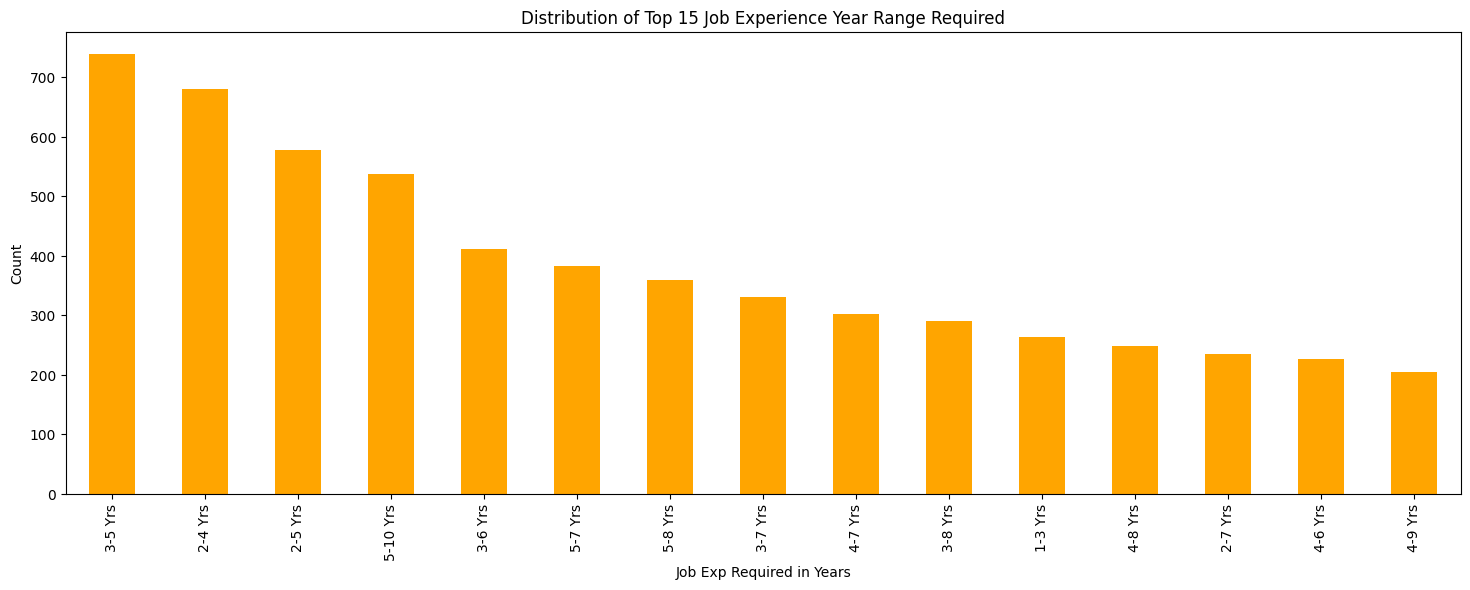

In [497]:
plt.figure(figsize=(18,6), facecolor='white')
df.groupby('Experience Required',sort=True)['Experience Required'].count().sort_values(ascending=False)[0:15].plot.bar(color="orange")
plt.xlabel('Job Exp Required in Years')
plt.ylabel('Count')
plt.title('Distribution of Top 15 Job Experience Year Range Required')
plt.show()